<a href="https://colab.research.google.com/github/K-Kilel/House-Pricing-Predictive-Model/blob/main/House_Pricing_Model_Analysis_Moringa_School_Independent_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HOUSE PRICING PREDICTIVE MODEL**

### **RESEARCH QUESTION**

As a Data Scientist for Hass Consulting Company, which is a real estate leader with over 25 years of experience, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### **METRIS FOR SUCCESS**

Find the factors that affect the housing prices. 

Create a model with a 85% prediction accuracy. 

### **UNDERSTANDING THE CONTEXT**

Different factors affect the cost of a house. Numerous factors that affect the pricing arise daily creating a demand for real estate businesses to accurately predict the prices.

### **EXPERIMENTAL DESIGN**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Incorporate categorical independent variables into your models.

Check for multicollinearity.

Provide a recommendation based on your analysis. 

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

### **DATA RELEVANCE**

The dataset used can be found on this link;




*   http://bit.ly/IndependentProjectWeek7Dataset

**Dataset Description**

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15







## **Reading the data**

In [39]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet



In [40]:
# Loading our Dataset 
hous_df = pd.read_csv('Independent Project Week 7 - house_data.csv')

### **Checking the Dataset**

In [41]:
# Determining the number of records
hous_df.shape

(21613, 20)

In [42]:
# Previewing the top records in our dataset
hous_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
# Previewing the bottom records in our dataset
hous_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [44]:
# Checking whether each column has an appropriate datatype

hous_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [45]:
# Converting the floats to int 

hous_df.apply(pd.to_numeric, errors= 'ignore').info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### **Tidying the dataset**

In [46]:
# Checking for missing data

hous_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing data in our dataset.

In [47]:
# Checking for duplicates. 
hous_df.duplicated().sum()

3

In [48]:
#Dropping the three records that are duplicates

hous_df.drop_duplicates(inplace= True)

## **Feature Engineering**

In [49]:
# Droppping the columns that are not relevant to our study

hous_df.drop(['id', 'zipcode', 'lat', 'long'], axis = 1, inplace = True)

In [50]:
# Changing the year of renovation to either renovated or not.

def year_renovated(x):
  if x > 0:
    return '1'
  else:
    return '0'

hous_df['yr_renovated'] = hous_df.yr_renovated.apply(lambda x: year_renovated(x))
hous_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


TypeError: ignored

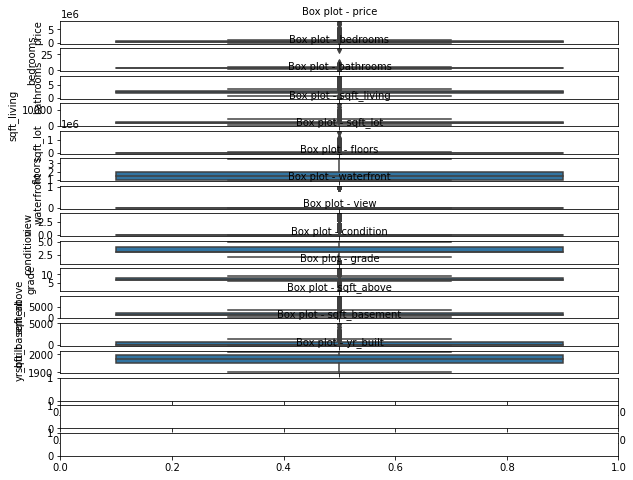

In [51]:
# Checking for outliers


col_names = hous_df.columns

fig, ax = plt.subplots(len(col_names), figsize=(10,8))

for i, col_val in enumerate(col_names):

    sns.boxplot(y= hous_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()



There are a lot of outliers on most columns. This could be due to the various considerations for each house so that the price of the house can increase.

### **Univariate Analysis**

In [53]:
hous_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


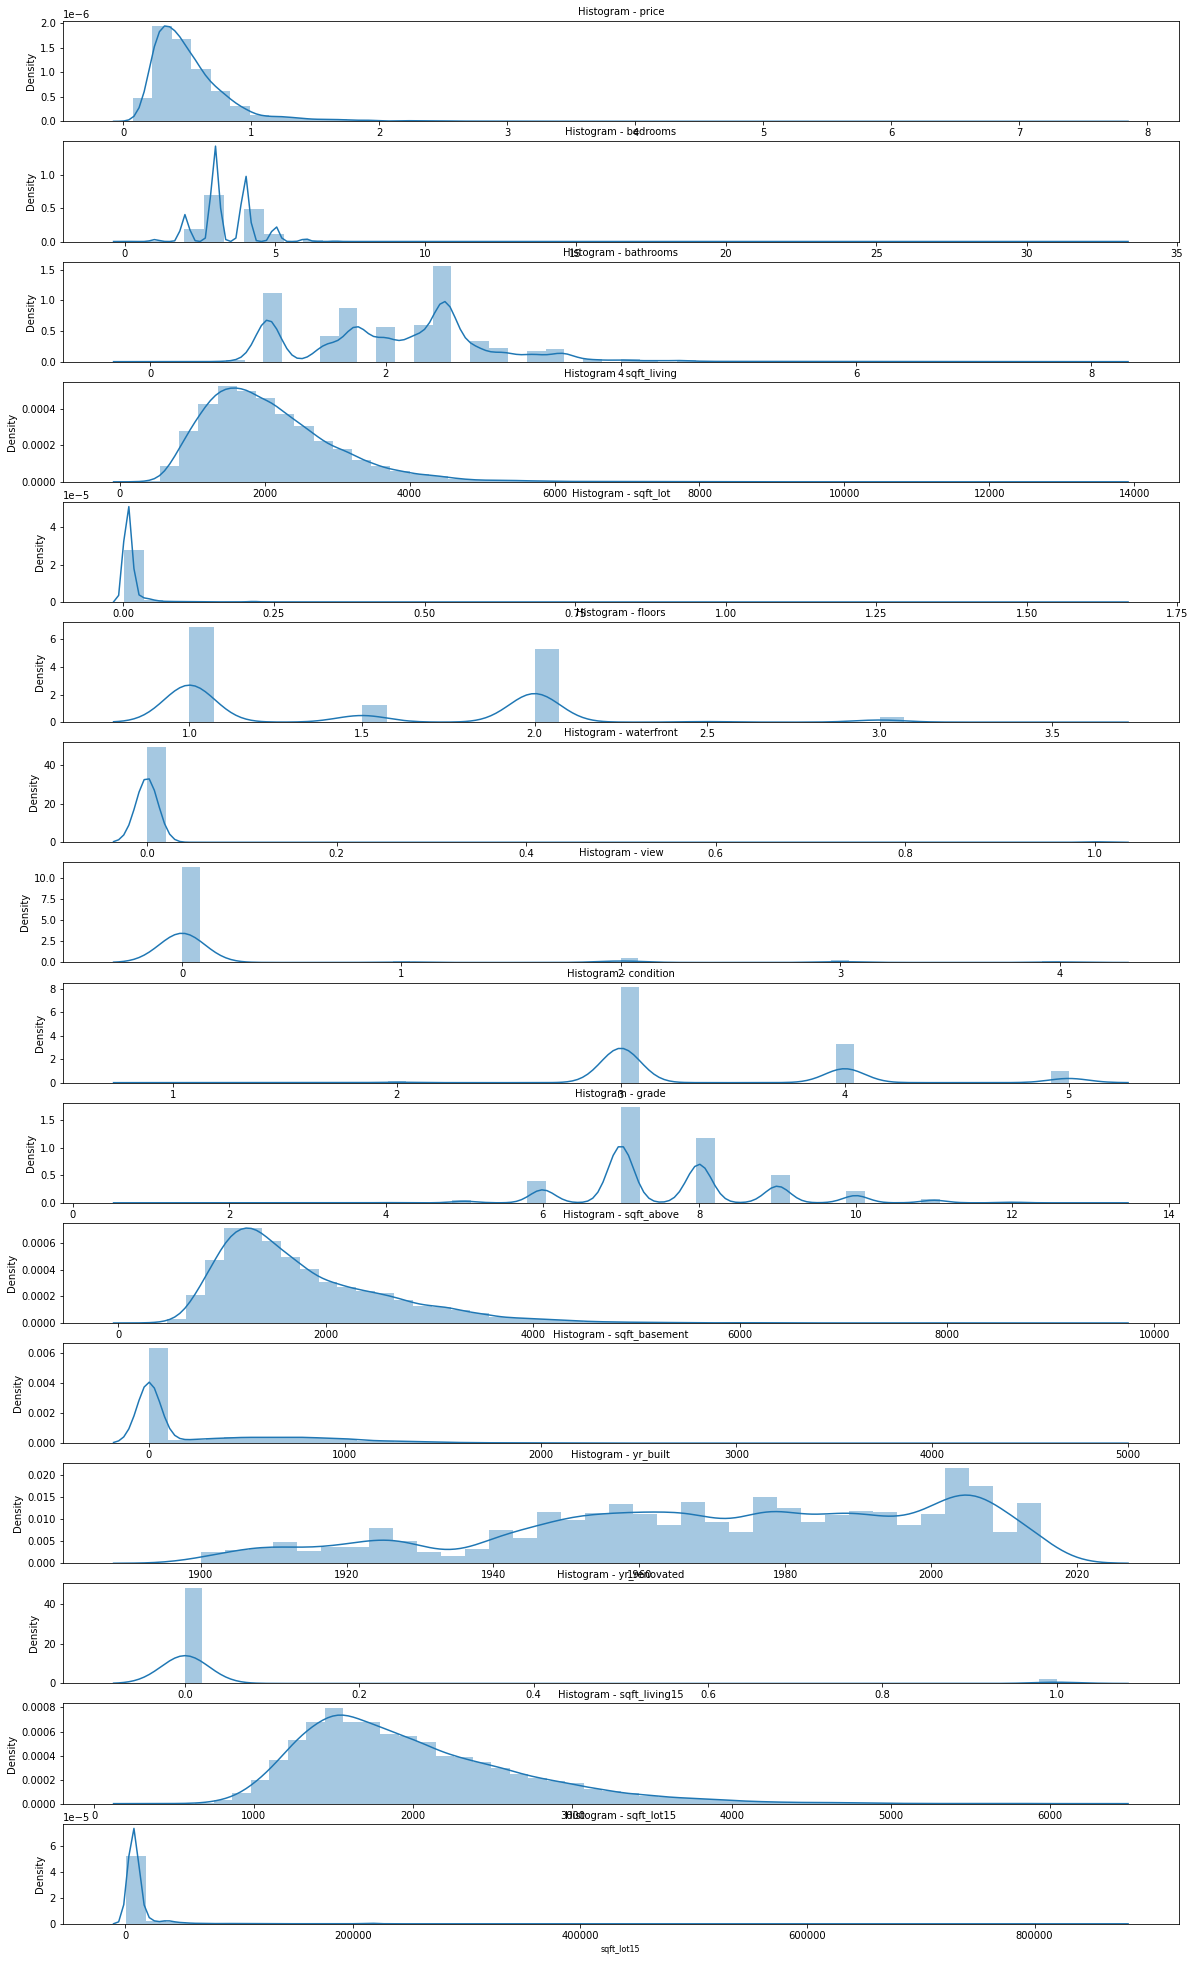

In [54]:
col_names = hous_df.columns

fig, ax = plt.subplots(len(col_names), figsize=(20,35))

for i, col_val in enumerate(col_names):

    sns.distplot(hous_df[col_val],hist = True, ax=ax[i])
    ax[i].set_title('Histogram - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

## **Bivariate Analysis**

Text(0.5, 1.0, 'Prices According to the Number of Bedrooms')

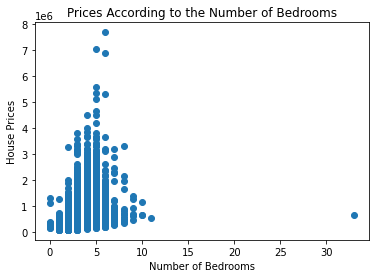

In [55]:
# Understanding the relationship of price and number of bedrooms
plt.scatter(hous_df['bedrooms'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Number of Bedrooms')
plt.title('Prices According to the Number of Bedrooms')

There is an increase in the price of houses as the bedrooms increase until the bedrooms gets to 5 and 6 bedrooms. Thereafter, the price start decreasing with more bedrooms.

Text(0.5, 1.0, 'Prices According to the Number of Bathrooms')

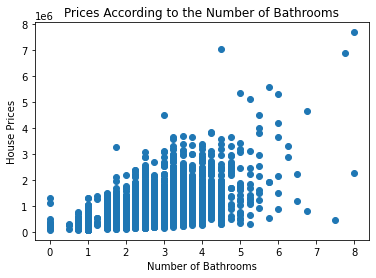

In [56]:
# Understanding the relationship of price and number of bathrooms
plt.scatter(hous_df['bathrooms'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Number of Bathrooms')
plt.title('Prices According to the Number of Bathrooms')

An increase in the number of bathrooms increases the price of the house.

Text(0.5, 1.0, 'price vs sqft_living')

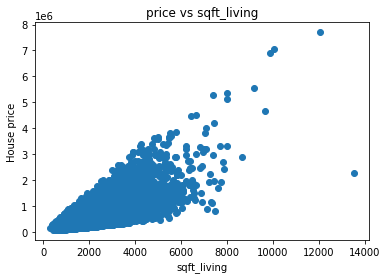

In [57]:
plt.scatter(hous_df["sqft_living"],hous_df["price"])
plt.ylabel("House price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")

An increase in thhe size of the living room increases the price of the house.

Text(0.5, 1.0, 'Prices According to the Number of Floors')

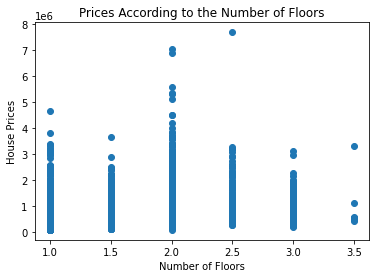

In [58]:
# Understanding the relationship of price and number of floors
plt.scatter(hous_df['floors'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Number of Floors')
plt.title('Prices According to the Number of Floors')

Text(0.5, 1.0, 'Prices According to the Condition')

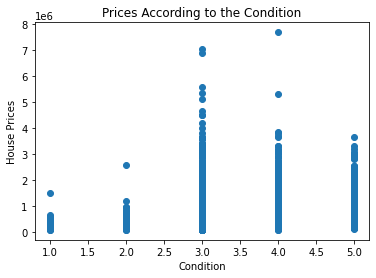

In [59]:
# Understanding the relationship of price and condition
plt.scatter(hous_df['condition'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Condition')
plt.title('Prices According to the Condition')

Text(0.5, 1.0, 'Prices According to the Year Built')

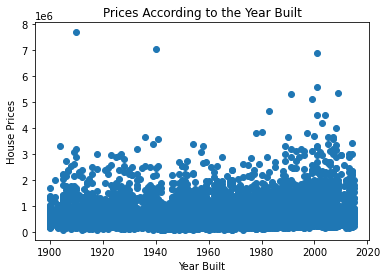

In [60]:
# Understanding the relationship of price and  the year it was built
plt.scatter(hous_df['yr_built'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Year Built')
plt.title('Prices According to the Year Built')

Text(0.5, 1.0, 'Prices According to the Year Renovated')

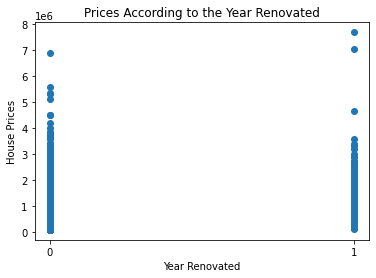

In [61]:
# Understanding the relationship of price and year it was renovated
plt.scatter(hous_df['yr_renovated'], hous_df['price'])
plt.ylabel('House Prices')
plt.xlabel('Year Renovated')
plt.title('Prices According to the Year Renovated')


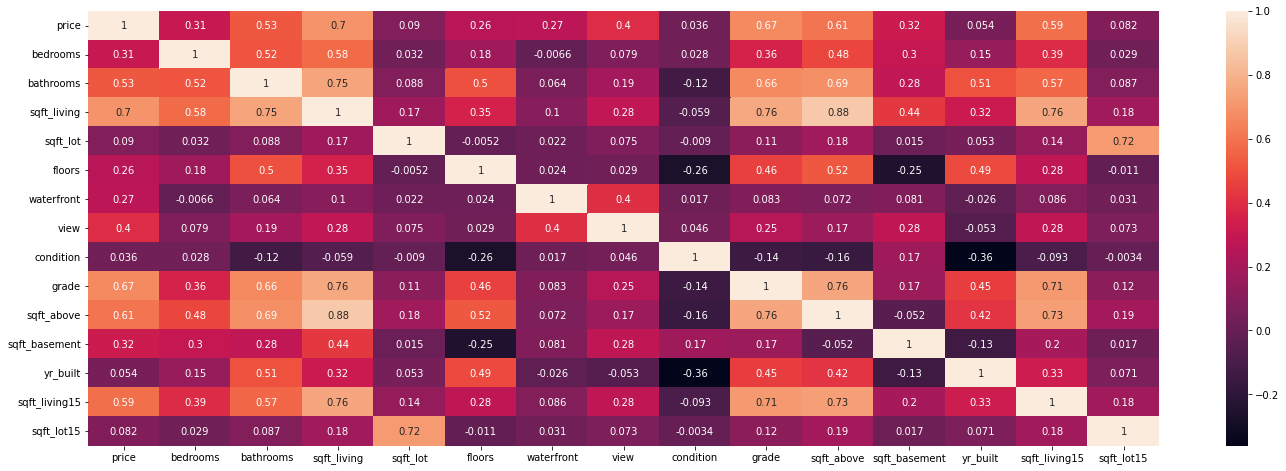

In [62]:
plt.figure(figsize=(24,8))

sns.heatmap(hous_df.corr(), xticklabels=hous_df.corr().columns.values, yticklabels=hous_df.corr().columns.values, annot= True)

There is a high correlation between sqft_living and sqft_living 15, sqft_lot and sq_lot15. We can drop one in each case because they perform similar role in creating the model and therefore it may reduce the accuracy of the model.

## **Multivariate Analysis**

### **Multiple Linear Regression**

In [63]:
hous_df.drop(['sqft_living15', 'sqft_lot15'],axis =1, inplace = True)

In [64]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.

X = hous_df.drop('price', axis =1)
y = hous_df['price']

In [65]:
# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [66]:
# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [67]:
# Perform PCA
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predicting 
y_pred = regressor.predict(X_test)

In [71]:
r2_score(y_test, y_pred)

0.6581499736302276

The accuracy of the model is 65%. For Multiple linear regression to be considered,we have to ensure we meet 4 conditions:


*   No or low multicollinearity. 

*  Homoscedasticity. 
*   Normality. 


*  Independent variables should be independent.








## **Multicollinearity**

In [74]:
# Picking independent variables only 
ind_df = hous_df.drop('price', axis = 1)

# Dispalying the correlation between indepent variables
correlations = ind_df.corr()

# Using Variance Inflation Factor(VIF) 
pd.DataFrame(np.linalg.inv(correlations.values), index=correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
bedrooms,1.639424,-0.455421,-5.814518e-01,0.102023,0.066553,0.064093,0.120219,-0.070616,0.327772,-3.394650e-01,-1.860481e-01,0.080678
bathrooms,-0.455421,3.282810,-3.076056e+00,0.031663,-0.713563,-0.007328,-0.035932,-0.092374,-0.266832,1.584825e+00,4.160460e-01,-0.797806
sqft_living,-0.584948,-3.073423,1.819677e+13,-0.045595,2.750696,-0.042235,-0.145653,-0.135987,-2.317269,-1.640658e+13,-8.768456e+12,0.585646
sqft_lot,0.102023,0.031663,-4.508187e-02,1.061381,0.142754,0.015688,-0.049870,-0.005795,0.080212,-3.373985e-01,-2.480144e-02,-0.044097
floors,0.066553,-0.713563,2.753521e+00,0.142754,1.875395,-0.014346,-0.029898,0.141405,-0.226326,-2.695860e+00,-7.076826e-01,-0.251445
waterfront,0.064093,-0.007328,-4.303486e-02,0.015688,-0.014346,1.198010,-0.489910,-0.004709,0.064195,-3.900983e-02,2.589153e-02,0.008537
view,0.120219,-0.035932,-1.440279e-01,-0.049870,-0.029898,-0.489910,1.378856,-0.000359,-0.261935,2.388335e-02,-2.408175e-01,0.198086
condition,-0.070616,-0.092374,-1.358614e-01,-0.005795,0.141405,-0.004709,-0.000359,1.187759,-0.001671,1.669370e-01,-3.758633e-03,0.390472
grade,0.327772,-0.266832,-2.320884e+00,0.080212,-0.226326,0.064195,-0.261935,-0.001671,2.988123,1.472036e-01,4.450717e-01,-0.422368
sqft_above,-0.339327,1.583222,-1.640658e+13,-0.336936,-2.693247,-0.039711,0.025345,0.167083,0.143804,1.479251e+13,7.905820e+12,-0.276384


The matrix above shows there are correlatons and there are some that are concerning since the VIF is above 5. Therfore, sqft_basement column will be dropped.

In [75]:
hous_df.drop('sqft_basement', axis = 1, inplace=True)

## **Residual Plots**

In [81]:
# We now create the residual by substracting the test value from the predicted value for each row in our dataset
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

1472.2276668463364

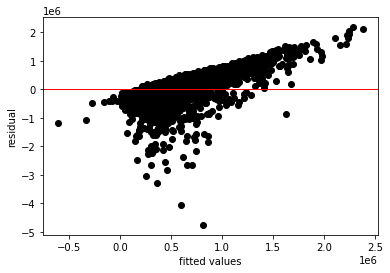

In [82]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## **Heteroscedasticity**

In [83]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## **Quantile Regression**

In [94]:
# Splitting the features and the target variable
X = hous_df.drop(['price', 'yr_renovated'], axis = 1)
y = hous_df['price']

In [95]:
# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [96]:
# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
model = smf.quantreg('y~X',hous_df)
res = model.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3943
Model:                       QuantReg   Bandwidth:                   2.427e+04
Method:                 Least Squares   Sparsity:                    3.368e+05
Date:                Mon, 29 Nov 2021   No. Observations:                21610
Time:                        01:43:59   Df Residuals:                    21598
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.632e+06   1.02e+05     45.550      0.000    4.43e+06    4.83e+06
X[0]       -2.585e+04   1577.123    -16.391      0.000   -2.89e+04   -2.28e+04
X[1]        2.272e+04   2695.079      8.431      0.000    1.74e+04     2.8e+04
X[2]         137.2411      3.580     38.334      0.0

The accuracy of Quantile Regression model is 39% which is less than the accuracy of the Multiple linear regression which was 69%.

## **Ridge Regression**

In [97]:
# Splitting the features and the target variable
X = hous_df.drop(['price', 'yr_renovated'], axis = 1)
y = hous_df['price']

# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [98]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge, param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [100]:
# We now use the .fit function to run the model and then use the .best_params_ and best_scores_ function to determine the models strength. 
search.fit(X,y)
print(search.best_params_)

abs(search.best_score_) 

{'alpha': 0.01}


47418938509.44357

In [102]:
# fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
y_pred=ridge.predict(X)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 46947102251.47822


In [103]:
#Checking the accuracy:
print("Accuracy:",ridge.score(X_test, y_test )* 100)

Accuracy: 65.85591430545075


The accuracy of Ridge Model is 66% which is slightly higher than the accuracy of the Linear Regression.

## **Lasso Regression**

In [104]:
# Splitting the features and the target variable
X = hous_df.drop(['price', 'yr_renovated'], axis = 1)
y = hous_df['price']

# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [105]:
#lets start building our model
model=Lasso(normalize=True)
search=GridSearchCV(model,param_grid={"alpha":np.concatenate((np.arange(-2,6,4),np.arange(2,8,0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("Lasso best parameters:", search.best_params_) 

Lasso best parameters: {'alpha': 6.5}


In [106]:
# Creating lasso regression with alpha value of 6.5
model=Lasso(alpha= 6.5,normalize=True)
model.fit(X,y)
y_pred=model.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test,y_pred))

Lasso MSE: 43422858425.17713


In [107]:
#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 65.85314168046695


Lasso model has an accuracy of 66% similar with Ridge model but slightly hugher than the Multiple Linear Regression.

## **Elastic Net Regression**

In [108]:
# Splitting the features and the target variable
X = hous_df.drop(['price', 'yr_renovated'], axis = 1)
y = hous_df['price']

# Splitting the the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 25)

In [111]:
model=ElasticNet(normalize=True)
search=GridSearchCV(model,param_grid={'alpha':np.logspace(-4,10,12),"l1_ratio":[0.5,0.3,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [112]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

print("Elastic net best parameters:", search.best_params_)

Elastic net best parameters: {'alpha': 0.0001, 'l1_ratio': 0.8}


In [116]:
# Creating lasso regression with alpha value of 0.0001

elastic=ElasticNet(normalize=True,alpha= 0.0001,l1_ratio=0.8)
elastic.fit(X,y)
y_pred=elastic.predict(X)
print("Elastic Net MSE:", mean_squared_error(y,y_pred)) 

Elastic Net MSE: 51957524080.817184


In [117]:
# Checking the accuracy:

print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 62.06248143565646


The accuracy of our Elastic Net Regression model is 62%. Slightly lower than the other regression models.

Conclusion

From our findings;

*   The data has a lot outliers that are affecting the accuracy of our model.

*   There is strong multicollinearity between the variables.

*   Ridge Regression and Lasso Regression models have higher accuracy prediction compared to the others.







